### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [2]:
nlp = spacy.load('en_core_web_sm')

### Importing the data

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
df["v1"] = df["v1"].apply(lambda x: 0 if x=="ham" else 1)

In [9]:
df = df[['v1','v2']]

In [10]:
df.shape

(5572, 2)

In [11]:
df["v1"].value_counts()

0    4825
1     747
Name: v1, dtype: int64

### Data preprocessing

In [12]:
def preprocessing(data):
    doc = nlp(data)
    clean_text = [str(token.lemma_) for token in doc if not token.is_punct and not token.is_stop and not token.is_digit]
    return ' '.join(clean_text)

In [13]:
df["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [14]:
df["new"] = df["v2"].apply(preprocessing)

In [15]:
df["new"][0]

'jurong point crazy available bugis n great world la e buffet Cine get amore wat'

In [25]:
y = df['v1'].copy()
X = df['new'].copy()

### train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
y_train.value_counts()

0    3238
1     495
Name: v1, dtype: int64

In [28]:
y_test.value_counts()

0    1587
1     252
Name: v1, dtype: int64

In [29]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

### Model Training

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

### Prediction metrics

In [32]:
# accuracy score on the training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
training_data_accuracy

0.970265202250201

In [33]:
# accuracy score on the training data
y_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(y_test_prediction, y_test)
training_data_accuracy

0.9526916802610114

In [34]:
confusion_matrix(y_test_prediction,y_test)

array([[1583,   83],
       [   4,  169]], dtype=int64)

In [35]:
def evaluate_model(model, X_test, y_test, classification_threshold=0.5):
    
    y_true = np.array(y_test)
    
    y_pred = (model.predict_proba(X_test) >= classification_threshold).astype(np.int)
    y_pred = list(map(
        lambda x: x[1],
        y_pred
    ))
    
    print("Test Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
    
    cm = confusion_matrix(y_true, y_pred)
    clr = classification_report(y_true, y_pred, target_names=["Not Spam", "Spam"])
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(np.arange(2) + 0.5, ["Not Spam", "Spam"])
    plt.yticks(np.arange(2) + 0.5, ["Not Spam", "Spam"])
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    return y_pred

Test Accuracy: 97.50%


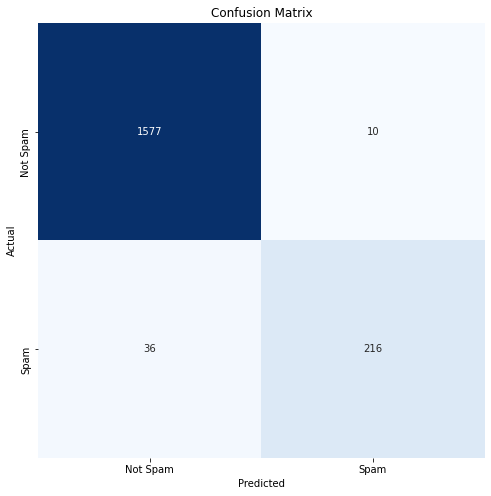

Classification Report:
----------------------
               precision    recall  f1-score   support

    Not Spam       0.98      0.99      0.99      1587
        Spam       0.96      0.86      0.90       252

    accuracy                           0.97      1839
   macro avg       0.97      0.93      0.94      1839
weighted avg       0.97      0.97      0.97      1839



In [36]:
y_pred=evaluate_model(model, X_test, y_test, classification_threshold=0.3)

In [37]:
f1_score(y_test,y_pred)

0.9037656903765691